## Genre Genie - Multi-label Classification with NLP
### Part BONUS: Making Wordclouds

#### Tom Keith

---

**Goal:** Make word clouds for each genre made up of the most 'genre defining' words.

**Result:** Only the last one (music) is good. Went in a different direction. This notebook is included for completeness only.

In [2]:
# Standard imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
#import scipy.sparse
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [7]:
my_model = 'models/my_1vr_linear_svc_default_coef.tsv'
coef_tdf = pd.read_csv(my_model, sep='\t', index_col=0)

In [8]:
coef_tdf.sort_values('g_action', ascending=False)

,g_action,g_adventure,g_animation,g_biography,g_comedy,g_crime,g_documentary,g_drama,g_family,g_fantasy,g_film-noir,g_history,g_horror,g_music,g_musical,g_mystery,g_romance,g_sci-fi,g_sport,g_thriller,g_war,g_western
f_runtime,0.997796,0.052923,-0.329772,0.151680,-0.136051,-0.098478,-0.125171,0.161513,-0.157185,-0.139964,-0.046469,0.234240,-0.372855,0.120316,0.074502,0.034689,0.109954,-0.061331,0.012625,0.053091,0.236038,0.229005
martial,0.911709,0.013249,0.004716,0.004809,0.007899,0.144156,-0.017203,0.013644,0.014669,0.010792,0.001714,-0.001862,-0.050044,-0.023646,-0.043697,0.059188,0.003521,0.002580,0.019606,-0.011106,0.013266,0.003471
f_release_year,0.890920,-0.202585,0.205493,0.156150,0.090189,0.207143,0.112173,-0.024676,-0.005681,0.000552,-0.192294,0.262658,-0.124317,-0.247146,-0.202726,-0.000374,-0.163564,-0.082269,-0.013732,0.092245,0.168980,0.168377
ninja,0.769761,-0.001171,0.027410,-0.002904,0.002299,0.154820,-0.008825,0.004832,0.014375,0.028811,0.009917,-0.019844,-0.021963,-0.019450,0.013165,-0.199818,0.019710,-0.010422,0.004106,0.018520,0.014577,-0.002513
assassin,0.558552,0.041472,-0.026600,0.039901,-0.002493,0.293026,-0.029352,0.011820,-0.055517,0.006958,-0.008786,0.044407,-0.103619,0.008930,-0.005445,-0.021765,0.008827,-0.006773,-0.025459,0.070991,-0.018785,-0.006073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
soccer,-0.815873,0.044549,-0.005697,0.035087,0.006679,-0.285658,0.001282,-0.016429,0.031688,0.057494,-0.004119,0.008563,-0.011107,-0.003523,-0.015317,-0.143949,0.013644,-0.031551,0.051553,-0.005774,-0.008383,-0.001688
wed,-0.911971,-0.056674,-0.020485,-0.012382,0.057280,-0.530367,0.002539,-0.029923,-0.084040,0.014317,-0.004747,-0.005752,-0.038464,0.026520,-0.021995,-0.157268,0.070162,-0.038708,-0.015667,-0.057919,0.010898,-0.012714
f_imdb_rating,-0.992456,-0.122722,0.277040,0.168530,-0.071904,1.286002,0.241488,0.239085,0.045930,0.015202,0.052162,0.150826,-0.554526,0.047041,0.012359,0.118412,-0.026726,-0.234360,0.013724,-0.086579,0.051071,0.007038
founder,-1.003134,-0.075309,-0.026460,0.042900,-0.001988,0.085528,0.003166,0.010445,0.006342,-0.031824,0.013195,0.011785,0.002544,-0.025328,0.004087,-0.000643,-0.015551,0.005420,-0.004634,-0.013408,-0.012196,-0.007860


In [12]:
genre_cols = coef_tdf.columns

In [13]:
action_coef_df = coef_tdf[coef_tdf.columns[coef_tdf.columns == genre_cols[0]]]
action_coef_df.sort_values(genre_cols[0], ascending=False)

,g_action
f_runtime,0.997796
martial,0.911709
f_release_year,0.890920
ninja,0.769761
assassin,0.558552
...,...
soccer,-0.815873
wed,-0.911971
f_imdb_rating,-0.992456
founder,-1.003134


In [10]:
animation_coef_df = coef_tdf[['g_animation']]
animation_coef_df = animation_coef_df[ animation_coef_df['g_animation'] > 0 ]
animation_freq_dict = animation_coef_df.to_dict()
animation_freq_dict = animation_freq_dict['g_animation']

In [11]:
'f_' in animation_coef_df['g_animation'].index.values[:2]

False

In [14]:
animation_coef_df.sort_values('g_animation', ascending=False)

,g_animation
f_imdb_rating,0.277040
f_release_year,0.205493
anim,0.076190
told,0.058722
hero,0.058706
...,...
dash,0.000033
dentist,0.000030
shame,0.000023
german,0.000019


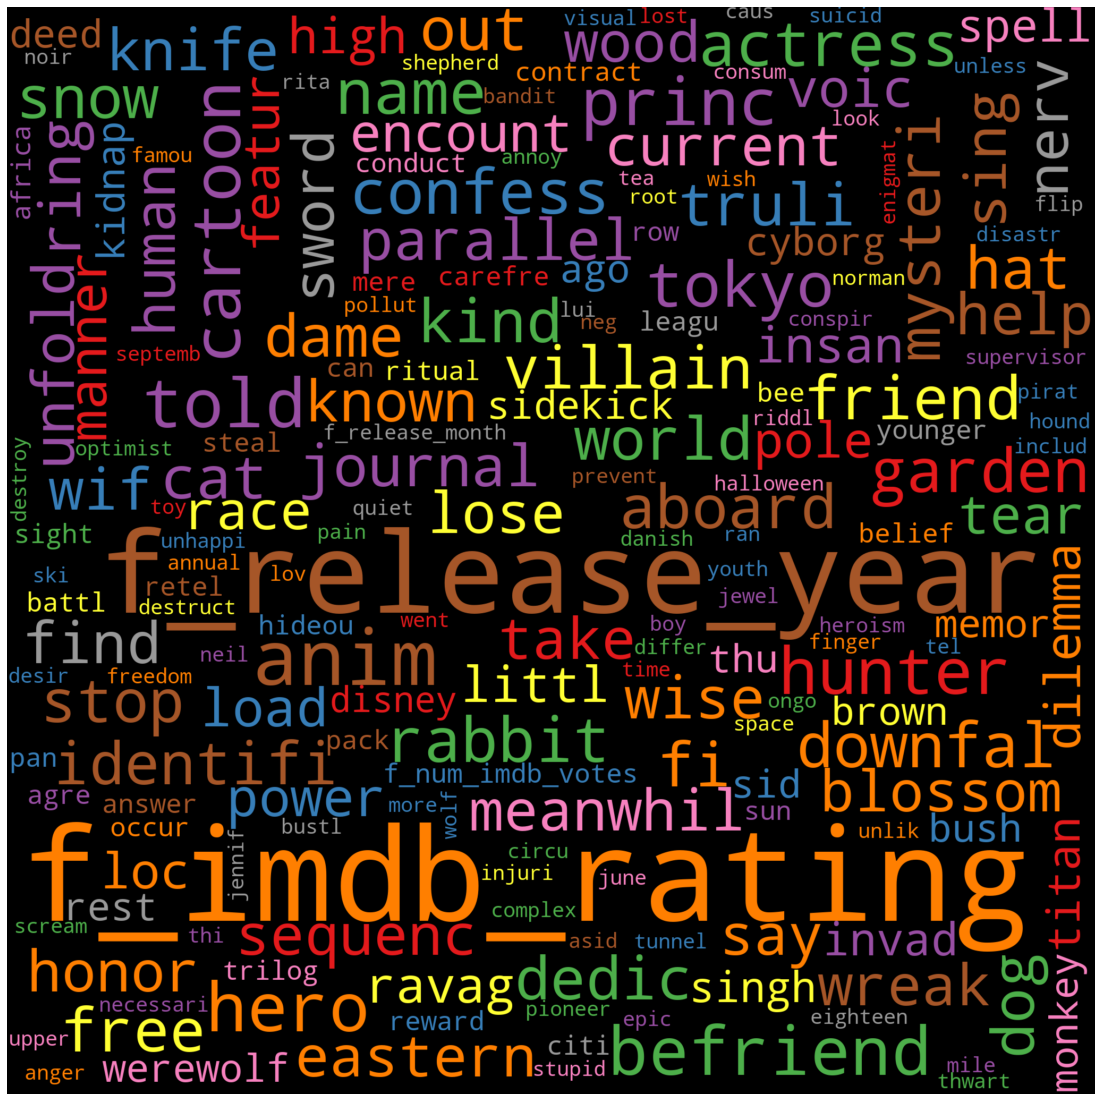

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud( width=2048, height=2048, background_color="black", colormap='Set1').generate_from_frequencies(animation_freq_dict)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [172]:
wordcloud.to_file("img/animation.png")

In [116]:
action_freq_dict = action_coef_df.to_dict()
action_freq_dict = action_freq_dict['g_action']

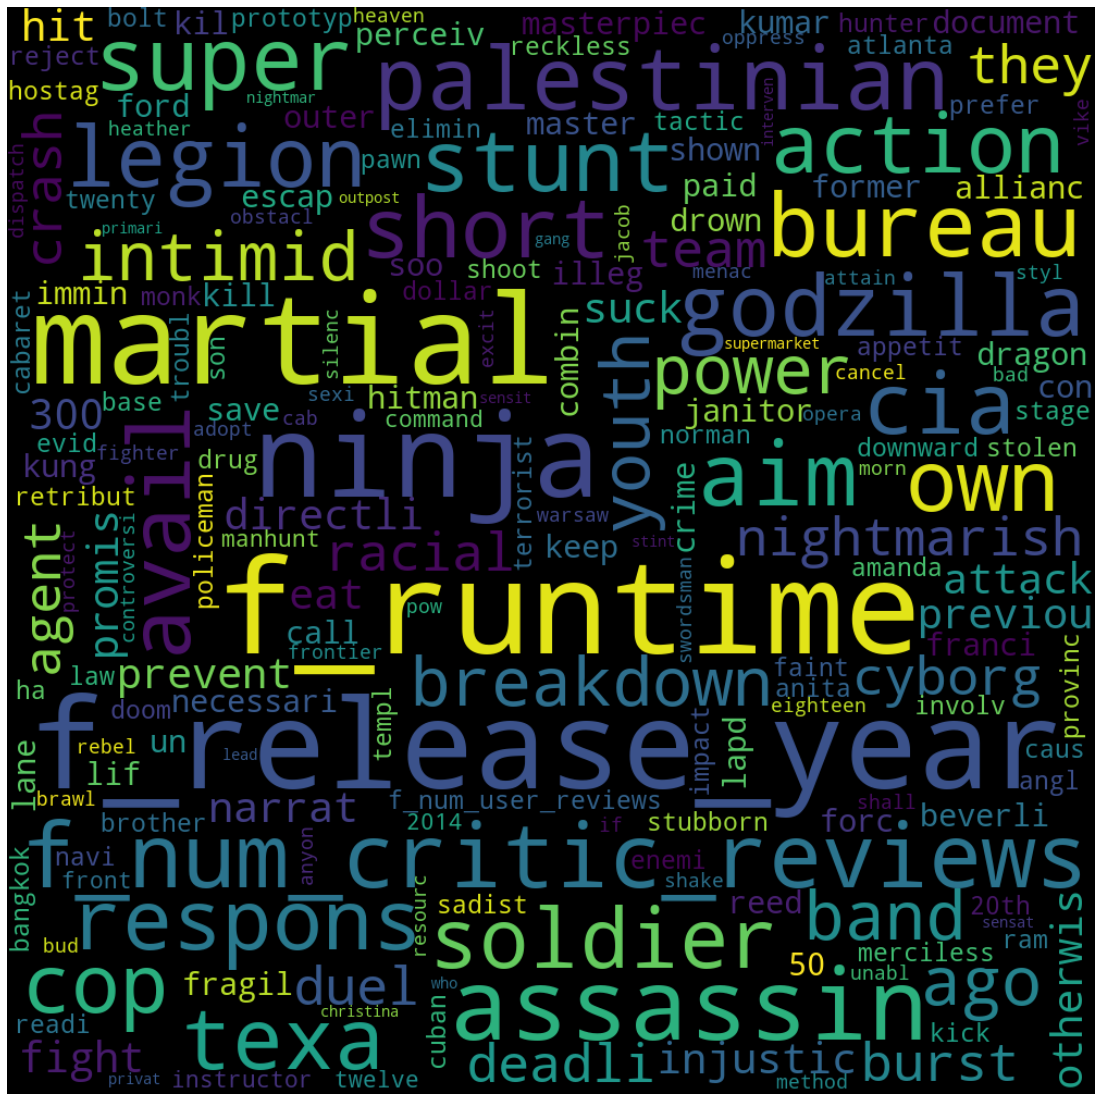

In [132]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#text = 
wordcloud = WordCloud(max_font_size=120, width=1000, height=1000, max_words=200, background_color="black").generate_from_frequencies(action_freq_dict)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

In [68]:
action_coef_df = coef_tdf[coef_tdf.columns[coef_tdf.columns == genre_cols[1]]]
action_coef_df.sort_values(genre_cols[1], ascending=False)

,adventure
num_critic_reviews,0.306125
america,0.301516
adventur,0.292967
vike,0.248250
pirat,0.236540
...,...
behavior,-0.357105
anew,-0.373368
poland,-0.380511
drama_x,-0.387129


In [191]:
len(musical_mask)

512

In [378]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


In [419]:
musical_coef_df.sort_values('g_musical', ascending=False).head(20)

,g_musical
music,0.135645
danc,0.063251
wood,0.060561
tim,0.059275
india,0.058748
romanc,0.058130
west,0.057291
broadcast,0.056974
earn,0.056170
love,0.055075


In [411]:
bad_df = musical_coef_df.index.isin(f_names)
musical_coef_df = musical_coef_df[~bad_df]

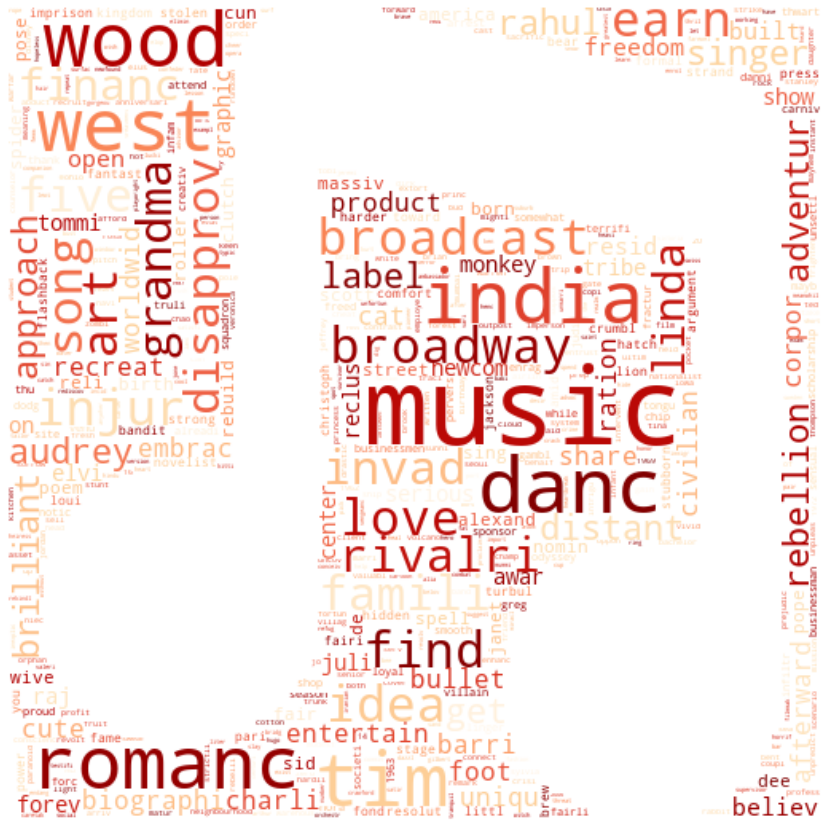

In [425]:
#musical_coef_df = coef_tdf[['g_musical']]
#musical_coef_df = musical_coef_df[ musical_coef_df['g_musical'] > 0 ]
musical_freq_dict = musical_coef_df.to_dict()
musical_freq_dict = musical_freq_dict['g_musical']

from PIL import Image
# Image is numpy array
musical_mask = np.array(Image.open('images/music.png'))

# Transform your mask into a new one that will work with the function:
transformed_musical_mask = np.ndarray((musical_mask.shape[0],musical_mask.shape[1]), np.int32)

for i in range(len(musical_mask)):
    transformed_musical_mask[i] = list(map(transform_format, musical_mask[i]))


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Init
stop_words = [f_names] + list(STOPWORDS)
wc = WordCloud(background_color="white", width=1500, height=1500, max_words=500, mask=transformed_musical_mask, stopwords=stop_words, colormap='OrRd_r')

# generate word cloud
wc.generate_from_frequencies(musical_freq_dict)
#wc.generate(" ".join(coef_tdf[['g_musical']].index.values))

# store to file
wc.to_file('images/wc_img.png')

# show
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()